In [14]:
import pandas as pd
from deap import base, creator, tools, algorithms
import numpy as np
import jenkspy
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module="deap.creator")
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [15]:
df = pd.read_csv("/Users/SamuelLP/Desktop/git/Challenge_Nexialog/data/df_score.csv", index_col=[0])

## Jenks

In [16]:
scores_clients = df["Score_ind"]
nombre_de_classes = 6 

breaks = jenkspy.jenks_breaks(scores_clients, nombre_de_classes)
print(breaks)

[0.0, 167.1826625386997, 365.3250773993808, 526.3157894736843, 653.250773993808, 786.3777089783281, 1000.0]


In [17]:
# breaks = [0.0, 210, 356, 508, 636, 771, 900.0]

df["Classes"] = np.digitize(df["Score_ind"], bins=sorted(breaks))

resultats = df.groupby("Classes").agg(
    moyenne_TARGET=("TARGET", "mean"),
    nb_individus=("TARGET", "size"), 
)
resultats['taux_individus'] = (resultats['nb_individus'] / df.shape[0]) * 100

print(resultats)

         moyenne_TARGET  nb_individus  taux_individus
Classes                                              
1              0.291999          5774        2.062143
2              0.186373         23630        8.439286
3              0.123497         34025       12.151786
4              0.083300         45402       16.215000
5              0.054224         75206       26.859286
6              0.031558         94333       33.690357
7              0.021472          1630        0.582143


In [18]:
df["date_mensuelle"] = pd.to_datetime(df["date_mensuelle"])
df['date_trimestrielle'] = df['date_mensuelle'].dt.year.astype(str) + '_' + df['date_mensuelle'].dt.quarter.astype(str)

In [19]:
def plot_stability_taux(train, variable):
    stability_df = train.groupby(['date_trimestrielle', variable])['TARGET'].mean().unstack()
    stability_df['stability'] = stability_df.std(axis=1) / stability_df.mean(axis=1)
    
    plt.figure(figsize=(10, 5))
    
    for class_label in stability_df.drop('stability', axis=1).columns:
        values = stability_df[class_label]
        plt.plot(stability_df.index, values, label=f'Classe {class_label}', marker='o')
    
    plt.title(f'Stabilité de l\'impact sur la cible pour {variable}')
    plt.xlabel('Date')
    plt.ylabel('Proportion de la cible TARGET')
    plt.legend(title=f'Classes de_binned', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

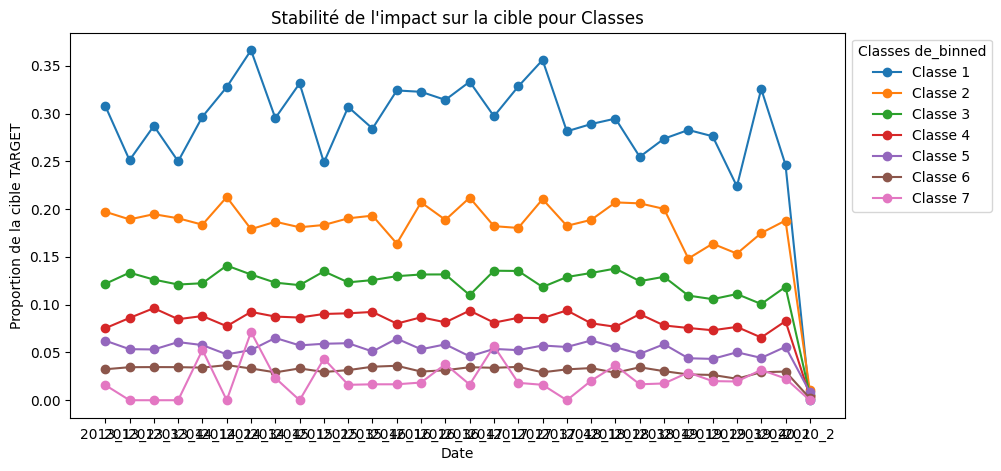

In [20]:
plot_stability_taux(df, "Classes")


In [21]:
df

,date_mensuelle,TARGET,DAYS_BIRTH_disc_int,EXT_SOURCE_2_disc_int,EXT_SOURCE_1_disc_int,AMT_CREDIT_SUM_disc_int,AMT_CREDIT_SUM_DEBT_disc_int,AMT_GOODS_PRICE_disc_int,DAYS_REGISTRATION_disc_int,DAYS_LAST_PHONE_CHANGE_disc_int,...,FLAG_WORK_PHONE,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER,Score_ind,Classes,date_trimestrielle
0,2013-01-01,0,[-13518;-7489],[0.47;0.85],[0.4;0.96],[0.0;632934.0],[32168.25;43650000.0],[679500.0;4050000.0],[-5742.0;0.0],[-1043.0;0.0],...,zero,un,zero,Cash loans,Y,Y,M,730.650155,5,2013_1
1,2013-01-01,0,[-13518;-7489],[0.47;0.85],[0.4;0.96],[0.0;632934.0],[-1083614.67;32167.93],[40500.0;676278.0],[-5742.0;0.0],[-1043.0;0.0],...,zero,un,zero,Cash loans,N,Y,F,925.696594,6,2013_1
2,2013-01-01,0,[-13518;-7489],[0.47;0.85],[0.12;0.4],[632936.25;198072344.25],[32168.25;43650000.0],[40500.0;676278.0],[-24672.0;-5743.0],[-1043.0;0.0],...,un,zero,zero,Cash loans,Y,N,F,662.538700,5,2013_1
3,2013-01-01,0,[-19757;-13519],[0.47;0.85],[0.12;0.4],[0.0;632934.0],[-1083614.67;32167.93],[679500.0;4050000.0],[-24672.0;-5743.0],[-1043.0;0.0],...,zero,zero,zero,Cash loans,Y,Y,F,693.498452,5,2013_1
4,2013-01-01,0,[-19757;-13519],[0.0;0.15],[0.0;0.12],[0.0;632934.0],[-1083614.67;32167.93],[40500.0;676278.0],[-5742.0;0.0],[-4292.0;-1044.0],...,zero,un,un,Cash loans,N,N,F,362.229102,2,2013_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,2020-04-01,1,[-19757;-13519],[0.47;0.85],[0.4;0.96],[0.0;632934.0],[-1083614.67;32167.93],[679500.0;4050000.0],[-24672.0;-5743.0],[-1043.0;0.0],...,zero,zero,zero,Cash loans,N,Y,F,835.913313,6,2020_2
279996,2020-04-01,1,[-19757;-13519],[0.47;0.85],[0.4;0.96],[0.0;632934.0],[32168.25;43650000.0],[40500.0;676278.0],[-5742.0;0.0],[-4292.0;-1044.0],...,zero,zero,zero,Cash loans,N,N,F,473.684211,3,2020_2
279997,2020-04-01,1,[-13518;-7489],[0.47;0.85],[0.4;0.96],[0.0;632934.0],[32168.25;43650000.0],[40500.0;676278.0],[-5742.0;0.0],[-4292.0;-1044.0],...,zero,zero,zero,Cash loans,Y,Y,F,730.650155,5,2020_2
279998,2020-04-01,1,[-13518;-7489],[0.15;0.47],[0.12;0.4],[0.0;632934.0],[32168.25;43650000.0],[40500.0;676278.0],[-5742.0;0.0],[-4292.0;-1044.0],...,zero,un,un,Cash loans,N,Y,F,222.910217,2,2020_2


In [13]:
df.to_csv("data_segmentees.csv", index=False)